In [42]:
import numpy as np
import math 
import time
import numpy as np
# 画图
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import time
import math
# 统计
from scipy import stats
import scipy.optimize as opt
from scipy.stats import norm, poisson
from scipy.optimize import leastsq
# 解决中文乱码问题
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
# range() 创建int类类 => list
# arange() 可以使用float类型 => array
# 0 - 60 (含头不含尾) 步长为 10  reshape -> 给予数组一个新的形状，而不改变它的数据
a = np.arange(0, 60, 10).reshape((-1, 1)) + np.arange(6)
print(a)
# 下面俩和上面对比着看就明白了
print(np.arange(6))
print(np.arange(0, 60, 10))

[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]
[0 1 2 3 4 5]
[ 0 10 20 30 40 50]


In [3]:
# 需要3个指针和3个整数对象，对于数值运算比较浪费内存和cpu
L = [1, 2, 3]
# 所以使用Numpy提供的ndarray对象 -> 存储单一数据类型的多维数组
_L = np.array(L)
print(_L)
# 获取长度
print(_L.shape)
b = np.array([[1,2], [2,3], [4,5], [6,7], [8,9], [10, 11]])
print(b)
print(b.shape)
# 可以强制性修改shape, 当某个轴为-1时，将根据数组元素的个数自动计算此轴的长度
b.shape = 2, -1
print(b)
print(b.shape)
# 使用reshape方法，可以创建改变了尺寸的新数组，原数组的shape保持不变, 并且reshape之后的数组与原数组更享内存数据(指向一致)
c = b.reshape((3, -1))
print(c)
# 数据类型
print(c.dtype)
# 指定数据类型
d = np.array([[2,3], [4,5]], dtype=np.float)
print(d)
# astype -> 数据类型转换
nf = d.astype(np.int)
print(nf)

[1 2 3]
(3,)
[[ 1  2]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]
(6, 2)
[[ 1  2  2  3  4  5]
 [ 6  7  8  9 10 11]]
(2, 6)
[[ 1  2  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
int32
[[ 2.  3.]
 [ 4.  5.]]
[[2 3]
 [4 5]]


In [4]:
# 线性
# linspace函数创建数组, params -> 初值， 终值，元素个数， 是否包含终值(缺省为True)
a = np.linspace(1, 10, 10)
print(a)
# 不包含终值
b = np.linspace(1, 10, 10, endpoint=False)
print(b)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
[ 1.   1.9  2.8  3.7  4.6  5.5  6.4  7.3  8.2  9.1]


In [5]:
# 对数
# 创建等比数列
# 10 ** 2 10的2次方
# 现实计算中 10^2 为10的2次方，但实际在算法中不是，上面的才是
# 当前起始值为 10**1， 终止值为 10**2, 有9个数的等比数列, 默认包含终止值
d = np.logspace(1, 2, 9)
# 10**1 - 10**4 
_d = np.logspace(1, 4, 4)
print(d)
print(_d)
print(10**3)
print(10^3)
# 创建基础值， 默认为10
# 2 ** 0  - 2 ** 10
g = np.logspace(0, 10, 11, base=2)
print(g)
print(2**0)
print(2**10)

[  10.           13.33521432   17.7827941    23.71373706   31.6227766
   42.16965034   56.23413252   74.98942093  100.        ]
[    10.    100.   1000.  10000.]
1000
9
[  1.00000000e+00   2.00000000e+00   4.00000000e+00   8.00000000e+00
   1.60000000e+01   3.20000000e+01   6.40000000e+01   1.28000000e+02
   2.56000000e+02   5.12000000e+02   1.02400000e+03]
1
1024


In [6]:
# 使用frombuffer, fromstring, fromfile等函数可以从字节序列创建数组
st = 'abcd'
# 对应ASCALL码值
g = np.fromstring(st, dtype=np.int8)
print(g)

[ 97  98  99 100]


In [7]:
# 存取
# 含头不含尾
a = np.arange(10)
print(a)
print(a[3])
# 切片[3:5] -> 含头不含尾，下标从第3位开始截取到第5位
print(a[3:5])
# 省略开始，则从0开始, 或者省略最后
print(a[:3])
print(a[3:])
# 步长为2(相隔2位)
print(a[2:8:2])
# 头尾省略，步长为-1 -> 翻转数组
print(a[::-1])
# 切片的数据和原始数据指向一致，共享数据
a[1:4] = 10, 20, 30
print(a)

b = a[1:4]
b[0] = 200
print(a)
print(b)

[0 1 2 3 4 5 6 7 8 9]
3
[3 4]
[0 1 2]
[3 4 5 6 7 8 9]
[2 4 6]
[9 8 7 6 5 4 3 2 1 0]
[ 0 10 20 30  4  5  6  7  8  9]
[  0 200  20  30   4   5   6   7   8   9]
[200  20  30]


In [8]:
# 根据整数数组存取
# 当使用整数序列对数组元素进行存取时，将整个整数序列中的每个元素作为下标，整数序列可以是列表或者是数组
# 使用整数序列作为下标获得的数组不和原始数组共享空间
a = np.logspace(0, 9, 10, base=2)
print(a)
i = np.arange(0, 10, 2)
print(i)
# 利用i做下标取a的数据
b = a[i]
print(b)
b[3] = 333
print(b)
print(a)

[   1.    2.    4.    8.   16.   32.   64.  128.  256.  512.]
[0 2 4 6 8]
[   1.    4.   16.   64.  256.]
[   1.    4.   16.  333.  256.]
[   1.    2.    4.    8.   16.   32.   64.  128.  256.  512.]


In [9]:
# 随机生成 10 个 0 - 1 中均匀分布的随机数 
a = np.random.rand(10)
print(a)
print(a > 0.5)
# 取出大于0.5的项
b = a[a > 0.5]
print('b = %s' % b)
# 将原始数据中 大于 0.5 的数据都强制指定为 0.5
a[a > 0.5] = 0.5
# b 不会受影响
print(a)
print(b)

[ 0.30476884  0.59905442  0.08485117  0.01907745  0.0139268   0.14922922
  0.26779415  0.87507077  0.41589546  0.63105229]
[False  True False False False False False  True False  True]
b = [ 0.59905442  0.87507077  0.63105229]
[ 0.30476884  0.5         0.08485117  0.01907745  0.0139268   0.14922922
  0.26779415  0.5         0.41589546  0.5       ]
[ 0.59905442  0.87507077  0.63105229]


In [10]:
# 行向量
a = np.arange(0, 60, 10)
print(a)
# 转为列向量
b = a.reshape((-1,1))
print(b)
# 行加列
f = a + b
print(f)

[ 0 10 20 30 40 50]
[[ 0]
 [10]
 [20]
 [30]
 [40]
 [50]]
[[  0  10  20  30  40  50]
 [ 10  20  30  40  50  60]
 [ 20  30  40  50  60  70]
 [ 30  40  50  60  70  80]
 [ 40  50  60  70  80  90]
 [ 50  60  70  80  90 100]]


In [11]:
# 合并上面的代码
a = np.arange(0, 60, 10).reshape((-1, 1))+np.arange(6)
print(a)
# 二维数组切片 行 列
# 第 0 行的第 2 个下标
print(a[[0,1,2], [2,3,4]])
# 行步长， 列步长
print(a[::2, ::2])

[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]
[ 2 13 24]
[[ 0  2  4]
 [20 22 24]
 [40 42 44]]


In [12]:
# 定义结构数组
personType = np.dtype({
    'names': ['name', 'age', 'weight'],
    # formats -> 格式
    # str32  
    # int32
    # float32
    'formats': ['S32', 'i', 'f']
})
a = np.array([('LaoPo', 27, 60.9), ('Me', 24, 64.1)], dtype=personType)
# b -> byte 字节字符
print(a)
print(a[1])
# 获取后数据共享
m = a[1]
print(m)
m['name'] = 'My'
print(a)
print(m)

[(b'LaoPo', 27,  60.90000153) (b'Me', 24,  64.09999847)]
(b'Me', 24,  64.09999847)
(b'Me', 24,  64.09999847)
[(b'LaoPo', 27,  60.90000153) (b'My', 24,  64.09999847)]
(b'My', 24,  64.09999847)


In [13]:
# 内存对齐
# C语言的结构体为了内存寻址方便，会自动的添加一些填充用的字节，这叫做内存对齐。
# 例如如果把下面的name[32]改为name[30]的话，由于内存对齐问题，在name和age中间会填补两个字节，最终的结构体大小不会改变。
# 因此如果numpy中的所配置的内存大小不符合C语言的对齐规范的话，将会出现数据错位。
# 为了解决这个问题，在创建dtype对象时，可以传递参数align=True，这样numpy的结构数组的内存对齐和C语言的结构体就一致了

In [15]:
a = np.array([[0,1,2], [3,4,5], [6,7,8]], dtype=np.float32)
print(a)
# 取
# 行步长， 列步长
b = a[::2, ::2]
print(b)

[[ 0.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]]
[[ 0.  2.]
 [ 6.  8.]]


In [16]:
# linspace函数创建数组, params -> 初值， 终值，元素个数， 是否包含终值(缺省为True)
x = np.linspace(0, 5, 5)
print(x)
# ufunc函数 -> universal function
# 基于c实现，速度快
# 对数组中的每个元素进行正弦计算
y = np.sin(x)
print(y)

[ 0.    1.25  2.5   3.75  5.  ]
[ 0.          0.94898462  0.59847214 -0.57156132 -0.95892427]


In [17]:
# 对比numpy.math和python标准库的math.sin计算速度
x = [i * 0.001 for i in range(1000000)]
start = time.clock()
# enumerate -> 枚举
# 遍历
for i, t in enumerate(x):
    x[i] = math.sin(t)
print('math.sin => %s' % (float(time.clock()) - float(start)))

x = np.array(x)
start = time.clock()
np.sin(x)
print('np.sin => %s' % (float(time.clock()) - float(start)))

math.sin => 0.3454618664140218
np.sin => 0.009354176535607162


In [18]:
a = np.arange(0, 4)
print(a)
b = np.arange(3, 7)
print(b)
# 对应元素的和
c = np.add(a, b)
print(c)

[0 1 2 3]
[3 4 5 6]
[3 5 7 9]


In [19]:
'''
y = x1 + x2:	add(x1, x2 [, y])
y = x1 - x2:	subtract(x1, x2 [, y])
y = x1 * x2:	multiply (x1, x2 [, y])
y = x1 / x2:	divide (x1, x2 [, y]), 如果两个数组的元素为整数，那么用整数除法
y = x1 / x2:	true divide (x1, x2 [, y]), 总是返回精确的商
y = x1 // x2:	floor divide (x1, x2 [, y]), 总是对返回值取整
y = -x:	negative(x [,y])
y = x1**x2:	power(x1, x2 [, y])
y = x1 % x2:	remainder(x1, x2 [, y]), mod(x1, x2, [, y])
'''

'\ny = x1 + x2:\tadd(x1, x2 [, y])\ny = x1 - x2:\tsubtract(x1, x2 [, y])\ny = x1 * x2:\tmultiply (x1, x2 [, y])\ny = x1 / x2:\tdivide (x1, x2 [, y]), 如果两个数组的元素为整数，那么用整数除法\ny = x1 / x2:\ttrue divide (x1, x2 [, y]), 总是返回精确的商\ny = x1 // x2:\tfloor divide (x1, x2 [, y]), 总是对返回值取整\ny = -x:\tnegative(x [,y])\ny = x1**x2:\tpower(x1, x2 [, y])\ny = x1 % x2:\tremainder(x1, x2 [, y]), mod(x1, x2, [, y])\n'

In [20]:
# 广播
# 当我们使用ufunc函数对两个数组进行计算时，ufunc函数会对这两个数组的对应元素进行计算，因此它要求这两个数组有相同的大小(shape相同)。如果两个数组的shape不同的话，会进行如下的广播(broadcasting)处理：
# 让所有输入数组都向其中shape最长的数组看齐，shape中不足的部分都通过在前面加1补齐
# 输出数组的shape是输入数组shape的各个轴上的最大值
# 如果输入数组的某个轴和输出数组的对应轴的长度相同或者其长度为1时，这个数组能够用来计算，否则出错
# 当输入数组的某个轴的长度为1时，沿着此轴运算时都用此轴上的第一组值

In [33]:
# # 列
# a = a.repeat(5, axis=1)
# print(a)
# 行
b = b.repeat(6, axis=0)
print(b)

[3 3 3 ..., 6 6 6]


In [34]:
# ogrid -> 像一个多维数组一样，用切片组元作为下标进行存取，返回的是一组可以用来广播计算的数组
# 开始值:结束值:步长，和np.arange(开始值, 结束值, 步长)类似
x, y = np.ogrid[0:5, 0:5]
print(x)
print(y)
# 开始值:结束值:长度j，当第三个参数为虚数时，它表示返回的数组的长度，和np.linspace(开始值, 结束值, 长度)类似
a, b = np.ogrid[0:1:4j, 0:1:3j]
print(a)
print(b)

[[0]
 [1]
 [2]
 [3]
 [4]]
[[0 1 2 3 4]]
[[ 0.        ]
 [ 0.33333333]
 [ 0.66666667]
 [ 1.        ]]
[[ 0.   0.5  1. ]]


In [37]:
# 行 axis = 0
print(np.add.reduce([[1,2,3], [4,5,6]]))
# 列
print(np.add.reduce([[1,2,3], [4,5,6]], axis=1))

[5 7 9]
[ 6 15]


In [38]:
a = np.arange(0, 60, 10).reshape((-1, 1)) + np.arange(5)
print(a)
# 二维数组切片
# 第 0 行 第 2 位下标
print(a[[0, 1, 2], [2, 3, 4]])
# 第 4 行 的 2，3, 4下标
print(a[4, [2, 3, 4]])
# 从第 4 行开始后面的都要
print(a[4:, [2, 3, 4]])

# 布尔值索引
i = np.array([True, True, False, True, False, False])
print(a[i])
# 取所有行的第 3 个下标
print(a[i, 3])

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]
 [50 51 52 53 54]]
[ 2 13 24]
[42 43 44]
[[42 43 44]
 [52 53 54]]
[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [30 31 32 33 34]]
[ 3 13 33]


In [39]:
# 元素去重
a = np.array((1, 1, 2, 1, 1, 3, 4, 5, 6, 4, 3, 2))
print(np.unique(a).reshape(3,-1))
# 二维数组去重
b = np.array(((1, 2), (2, 3), (1, 2), (3,4)))
print(b)
# 先取出放入元组中，然后就可以在放入set集合中，然后利用集合的特性去重
print('去重: %s \n' % np.array(list(set([tuple(t) for t in b]))))

[[1 2]
 [3 4]
 [5 6]]
[[1 2]
 [2 3]
 [1 2]
 [3 4]]
去重: [[1 2]
 [3 4]
 [2 3]] 



In [40]:
# 矩阵相乘
a = np.arange(1, 10) .reshape(3, 3)
print(a)
b = a + 10
print(b)
print('-----------------------')
# a 的第一行 乘以 b 的第一列 再求和
print(np.dot(a, b))
# 对应位置相乘
print('------------------------')
print(a * b)
print(np.multiply(a, b))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[11 12 13]
 [14 15 16]
 [17 18 19]]
-----------------------
[[ 90  96 102]
 [216 231 246]
 [342 366 390]]
------------------------
[[ 11  24  39]
 [ 56  75  96]
 [119 144 171]]
[[ 11  24  39]
 [ 56  75  96]
 [119 144 171]]


In [41]:
# 拼接
a = np.arange(1, 10)
b = np.arange(20, 30)
print(np.concatenate((a, b)))

[ 1  2  3  4  5  6  7  8  9 20 21 22 23 24 25 26 27 28 29]


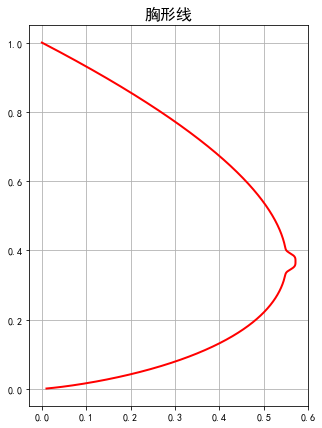

In [43]:
# 胸线图
x = np.arange(1, 0, -0.001)
# log -> 对数
# exp -> 指数
y = (-3 * x * np.log(x) + np.exp(-(40 * (x - 1 / np.e)) ** 4) / 25) / 2
# 设置尺寸和背景
plt.figure(figsize=(5, 7), facecolor='w')
plt.plot(y, x, 'r-', linewidth=2)
# 网格
plt.grid(True)
plt.title(u'胸形线', fontsize=16)
plt.show()

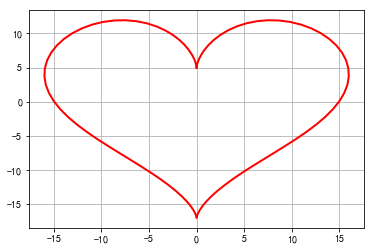

In [44]:
# 心形图
t = np.linspace(0, 2 * np.pi, 100)
x = 16 * np.sin(t) ** 3
y = 13 * np.cos(t) - 5 * np.cos(2 * t) - 2 * np.cos(3 * t) - np.cos(4 * t)
plt.plot(x, y, 'r-', linewidth=2)
# plt.plot(x, 'r--', linewidth=3)
# plt.plot(y, 'r.', linewidth=3)
plt.grid(True)
plt.show()

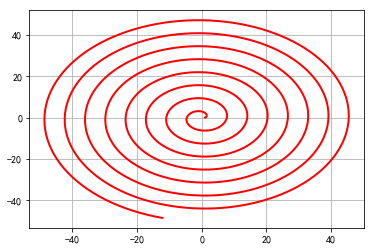

In [45]:
# 渐开线
t = np.linspace(0, 50, 1000)
x = t * np.sin(t) + np.cos(t)
y = np.sin(t) - t * np.cos(t)
plt.plot(x, y, 'r-', linewidth=2)
plt.grid()
plt.show()

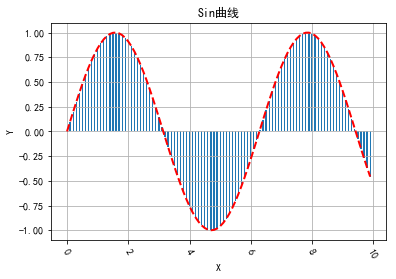

In [46]:
# Bar
x = np.arange(0, 10, 0.1)
y = np.sin(x)
plt.bar(x, y, width=0.04, linewidth=0.2)
plt.plot(x, y, 'r--', linewidth=2)
plt.title(u'Sin曲线')
plt.xticks(rotation = -60)
# 坐标
plt.xlabel('X')
plt.ylabel('Y')
# 格子
plt.grid()
plt.show()

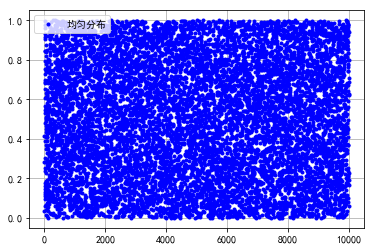

In [48]:
# 概率分布
# 10000 个 样本，包含 0 不包含 1
x = np.random.rand(10000)
t = np.arange(len(x))
# 直方图  30份 0.5的透明度
# plt.hist(x, 30, color='m', alpha=0.5, label=u'均匀分布')
# plt.plot(t, x, 'r-', label=u'均匀分布')
plt.plot(t, x, 'b.', label=u'均匀分布')
plt.legend(loc='upper left')
plt.grid()
plt.show()

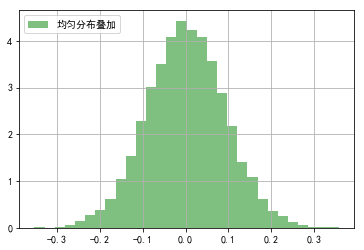

In [49]:
# 验证中心极限定理 -> 高斯函数图像
t = 1000
# 全零矩阵
a = np.zeros(10000)
for i in range(t):
    # 从 -5 到 5 做均匀分布
    a += np.random.uniform(-5, 5, 10000)
a /= t    
plt.hist(a, bins=30, color='g', alpha=0.5, normed=True, label=u'均匀分布叠加')
# 标签放在左上方
plt.legend(loc='upper left')
plt.grid()
plt.show()

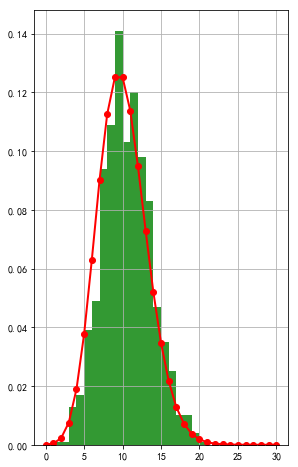

In [50]:
# 其他分布的中心极限定理
lamda = 10
# 模型
p = stats.poisson(lamda)
# 离散随机值采样 -> 满足lamda = 10
y = p.rvs(size = 1000)
mx = 30
r = (0, mx)
bins = r[1] - r[0]
plt.figure(figsize=(10, 8), facecolor='w')
# 1 行 2 列 现在画第 1 个图
plt.subplot(121)
# range -> 范围
# 采样的得到的质量函数
plt.hist(y, bins=bins, range=r, color='g', alpha=0.8, normed=True)
t = np.arange(0, mx + 1)
# pmf -> 概率质量函数
plt.plot(t, p.pmf(t), 'ro-', lw=2)
plt.grid(True)
plt.show()

[ 4  9  4 ...,  5 10  6]


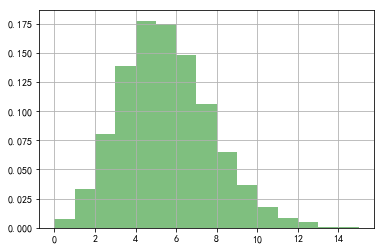

(array([ 0.00730073,  0.03290329,  0.08060806,  0.13831383,  0.17751775,
        0.17491749,  0.14791479,  0.10611061,  0.0650065 ,  0.03680368,
        0.01770177,  0.00820082,  0.00480048,  0.0010001 ,  0.00090009]), array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.]), <a list of 15 Patch objects>)
1.0


In [51]:
# Poission 分布
x = np.random.poisson(lam=5, size=10000)
print(x)
pillar = 15
a = plt.hist(x, bins=pillar, normed=True, range=[0, pillar], color='g', alpha=0.5)
plt.grid()
plt.show()
print(a)
# 求和
print(a[0].sum())

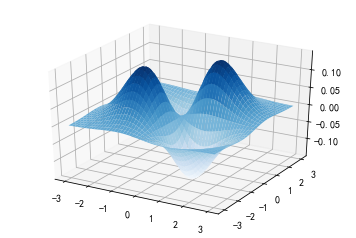

In [52]:
# 绘制三维图像
# -3 到 3 取 100个  j -> 个数
# x => 行， y => 列
# mgrid => 行列
# x, y = np.ogrid[-3:3:100j, -3:3:100j]

# meshgrid => 行列
a = np.linspace(-3, 3, 101)
# print(a)
x, y = np.meshgrid(a, a)
# print(x)
# print(y)

# u = np.linspace(-3, 3, 101)
# x, y = np.meshgrid(u, u)
# 二元正态分布
# math.sqrt -> 平方根
# z = np.exp(-(x ** 2 + y ** 2) / 2) / math.sqrt(2 * math.pi)

z = x * y * np.exp(-(x ** 2 + y ** 2) / 2) / math.sqrt(2 * math.pi)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.plot_suface(x, y, z,  cmap=cm.coolwarm, linewidth=0.1)
# rstride -> 行，cstride -> 列， cmap -> 颜色
ax.plot_surface(x, y, z, rstride=3, cstride=2, cmap=cm.Blues, linewidth=0.5)
plt.show()

(51,)
(51,)


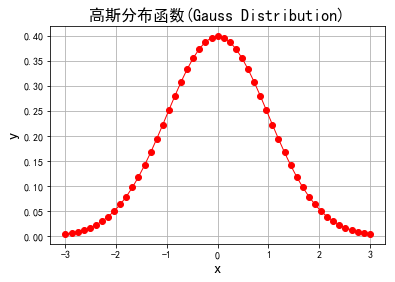

In [58]:
'''
绘制正态分布概率密度函数图
'''
# 均值 
mu = 0
# 方差
sigma = 1
# 创建等差数列
# 均值加减3倍的方差， 同时保证 0 可以一定被取到
# 行向量
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 51)
print(x.shape)
# exp -> 指数
# math.sqrt -> 根号(开方)
# 满足均值，方差的 y
y = np.exp(-(x - mu) ** 2 / (2* sigma ** 2)) / (math.sqrt(2 * math.pi) * sigma)
print(y.shape)

# 创建独立绘画空间
# facecolor -> 背景取白色
plt.figure(facecolor='w')
# 画图
# params -> 横坐标，纵坐标，实线，横坐标，纵坐标，圆圈，实线宽度为2，圆圈大小为8
# plt.plot(x, y, 'r-', x, y, 'go', linewidth=2, markersize=8)

# 只画线
# ro-  -> 红色的线和圆圈
plt.plot(x, y, 'ro-', linewidth=1)

# 横纵坐标 指定 标记，字号为15
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
# 配置中文
plt.title(u'高斯分布函数(Gauss Distribution)', fontsize=16)
# 边界(虚线格子)
plt.grid(True)
plt.show()

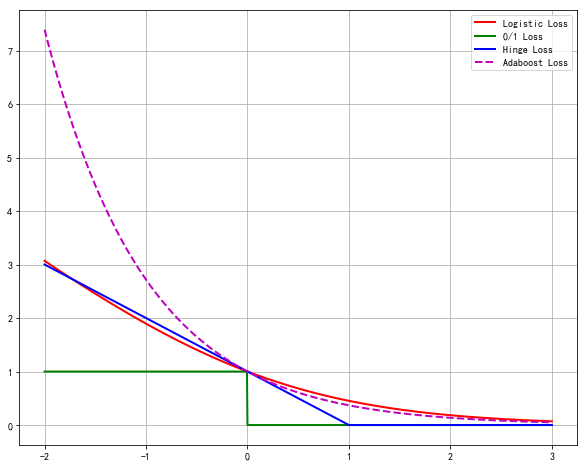

In [59]:
'''
损失函数: Logistic损失(-1,1) SVM  Hinge损失 0/1损失
'''
# 横坐标-2 到 3，取足够多float类型的值
x = np.array(np.linspace(start=-2, stop=3, num=1001, dtype=np.float))
# Logistic Loss
# log -> 对数 exp -> 指数
# 为了保证可以经过 x=0, y=1 除以 一个系数
y_logit = np.log(1 + np.exp(-x)) / math.log(2)
# 提升
y_boost = np.exp(-x)
# 负的都取 1 ， 正的都取 0 -> Ture 为 1， False 为 0
y_01 = x < 0
# SVM loss
y_hinge = 1.0 - x
# 比0小强制取为0
y_hinge[y_hinge < 0] = 0
# plt.figure(facecolor='w')
# 指定尺寸
plt.figure(figsize=(10, 8))
plt.plot(x, y_logit, 'r-', label='Logistic Loss', linewidth=2)
plt.plot(x, y_01, 'g-', label='0/1 Loss', linewidth=2)
plt.plot(x, y_hinge, 'b-', label='Hinge Loss', linewidth=2)
plt.plot(x, y_boost, 'm--', label='Adaboost Loss', linewidth=2)
plt.grid()
# 图线的说明(根据label)，放在右上角
plt.legend(loc='upper right')
# 保存一张图片
plt.savefig('loss.png')
plt.show()

In [53]:
'''
矩阵运算
'''
# 划重点 -> 不推荐在较复杂的程序中使用 matrix
a = np.matrix([[1,2,3], [5,5,6], [7,9,9]])
# a ** -1  -> a 的 逆矩阵
print(a * a ** -1)
# reshape -> 转为二维 -> 3行5列
b = np.arange(15).reshape(3,5)
print(b)
# T 转置
# 5行3列
print(b.T)

[[  1.00000000e+00   0.00000000e+00  -5.55111512e-17]
 [  4.44089210e-16   1.00000000e+00   3.33066907e-16]
 [  4.44089210e-16   0.00000000e+00   1.00000000e+00]]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


In [54]:
# 矩阵的乘积可以使用dot函数进行计算。
# 对于二维数组，它计算的是矩阵乘积，对于一维数组，它计算的是其点积。
# 将一维数组当作列矢量或者行矢量进行矩阵运算时， 使用reshape函数将一维数组转换为二维数组
'''
dot : 对于两个一维的数组，计算的是这两个数组对应下标元素的乘积和(数学上称之为内积)；
      对于二维数组，计算的是两个数组的矩阵乘积；
      对于多维数组，它的通用计算公式如下，即结果数组中的每个元素都是：数组a的最后一维上的所有元素与数组b的倒数第二位上的所有元素的乘积和
      dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])
'''
a = np.arange(12).reshape(2,3,2)
print(a)
print('---------------')
b = np.arange(12, 24).reshape(2,2,3)
print(b)
print('---------------')
c = np.dot(a, b)
print(c)

[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]
---------------
[[[12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]]]
---------------
[[[[ 15  16  17]
   [ 21  22  23]]

  [[ 69  74  79]
   [ 99 104 109]]

  [[123 132 141]
   [177 186 195]]]


 [[[177 190 203]
   [255 268 281]]

  [[231 248 265]
   [333 350 367]]

  [[285 306 327]
   [411 432 453]]]]


In [55]:
# inner : 和dot乘积一样，对于两个一维数组，计算的是这两个数组对应下标元素的乘积和；
# 对于多维数组，它计算的结果数组中的每个元素都是：
# 数组a和b的最后一维的内积，因此数组a和b的最后一维的长度必须相同
# inner(a, b)[i,j,k,m] = sum(a[i,j,:]*b[k,m,:])

In [56]:
# outer : 只按照一维数组进行计算，如果传入参数是多维数组，则先将此数组展平为一维数组之后再进行运算。
# outer乘积计算的列向量和行向量的矩阵乘积
print(np.outer([1,2,3], [4,5,6,7]))

[[ 4  5  6  7]
 [ 8 10 12 14]
 [12 15 18 21]]


In [57]:
'''
矩阵中更高级的一些运算可以在NumPy的线性代数子库linalg中
inv函数计算逆矩阵，solve函数可以求解多元一次方程组
solve函数有两个参数a和b。a是一个N*N的二维数组，而b是一个长度为N的一维数组，solve函数找到一个长度为N的一维数组x，使得a和x的矩阵乘积正好等于b，数组x就是多元一次方程组的解
'''
# 10行10列
a = np.random.rand(10, 10)
print(a)

[[ 0.23309954  0.47421617  0.89733338  0.63047237  0.59516495  0.76702443
   0.71893123  0.75723883  0.86272988  0.90795602]
 [ 0.4457207   0.86273461  0.20482105  0.8102345   0.75554625  0.98988014
   0.84350736  0.08070989  0.79803608  0.94558433]
 [ 0.60321852  0.12385464  0.53583779  0.36064394  0.06891878  0.86964937
   0.61619755  0.48329052  0.2516792   0.14147569]
 [ 0.69852358  0.57546771  0.59728982  0.95139419  0.5875354   0.71408328
   0.4813771   0.66757434  0.05418163  0.38648622]
 [ 0.07420198  0.80097788  0.37823324  0.25230933  0.93778331  0.59075734
   0.50456635  0.43427549  0.99798219  0.40296123]
 [ 0.92052222  0.34009635  0.03453296  0.544692    0.05861028  0.42704519
   0.87157337  0.07087095  0.59134827  0.95244486]
 [ 0.37295527  0.09181097  0.78547887  0.99490409  0.75635013  0.58875169
   0.70737262  0.06554678  0.45011884  0.01449733]
 [ 0.35095583  0.32017554  0.60531039  0.39665041  0.62433634  0.15713322
   0.12362714  0.48300396  0.89725041  0.91468442]


In [60]:
# 获取指定字符
for i in range(65, 91):
  # A - Z
  print(str(chr(i)))

A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z


In [61]:
# 相关系数矩阵
from numpy import corrcoef, mean, std, multiply
vc = [1,2,39,0,8]
vb = [1,2,38,0,8]
print(mean(multiply((vc-mean(vc)), (vb-mean(vb)))) / (std(vb) * std(vc)))
# corrcoef 得到相关系数矩阵(向量的相似程度)
print(corrcoef(vc, vb))

0.999986231331
[[ 1.          0.99998623]
 [ 0.99998623  1.        ]]


In [62]:
# 协方差
from numpy import cov, sum, multiply, mean
b = [1,3,5,6]
print(cov(b))
# 推
print(sum((multiply(b,b))-mean(b)*mean(b))/3)

# cov的参数是矩阵
# 输出结果也是矩阵
# 输出的矩阵为协方差矩阵
x = [[0, 1, 2],[2, 1, 0]]
print(cov(x))
print(sum((multiply(x[0],x[1]))-mean(x[0])*mean(x[1]))/2)

4.916666666666666
4.91666666667
[[ 1. -1.]
 [-1.  1.]]
-1.0


In [63]:
# 构建对角矩阵
from numpy import diag
d = [1, 2, 3]
dd = diag(d)
print(dd)

[[1 0 0]
 [0 2 0]
 [0 0 3]]


In [66]:
# 矩阵点积
# 矩阵乘
l = [[1,2,3], [4,5,6], [7,8,9]]
d = np.dot(l, 2)
print(d)
x = np.array([[1,2], [3,4]])
y = np.array([[5,6], [7,8]])
print(x.dot(y))

[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]
[[19 22]
 [43 50]]


In [69]:
# 矩阵的特征值和特征向量
from numpy import mat, linalg, transpose
a = mat([[1,0,0,0,2], [0,0,3,0,0], [0,0,0,0,0], [0,4,0,0,0]])
b = a * a.T
print(b)

[[ 5  0  0  0]
 [ 0  9  0  0]
 [ 0  0  0  0]
 [ 0  0  0 16]]


In [70]:
# 将时间按照指定的格式转换
# import time
# import datetime, deate
# d = datetime.strptiime()
print(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime()))

2018-01-14 23:05:46


In [72]:
# 随机打乱列表中的元素数据
import random
a = list(range(9))
print(a)
random.shuffle(a)
print(a)

[0, 1, 2, 3, 4, 5, 6, 7, 8]
[6, 1, 7, 0, 5, 2, 3, 4, 8]


In [73]:
# 矩阵的行列数
from numpy import shape, array
a = array([[1,2,3], [4,5,6]])
print(a)
print(a.shape)

[[1 2 3]
 [4 5 6]]
(2, 3)


In [74]:
# 指定行数全一矩阵
# 返回按要求的矩阵
from numpy import ones
ones = ones((2,1))
print(ones)

[[ 1.]
 [ 1.]]


In [75]:
import numpy as np
# 维数
a = np.random.random((3, 4))
print(a)

# 取到2，从1开始取到3，含头不含尾
b = a[:2, 1:3]
print(b)

row_r1 = a[1, :]
row_r2 = a[1:2, :]
# 区别
# 使用切片语法访问数组时，得到的是原数组的子集
print(row_r1)
print(row_r2)
print('------------------------------')

ar = np.random.random((4, 2))
print(ar)
# 行(row) 列(col)
print(ar[[0,1,2], [0,1,0]])
print(ar[[0,0], [1,1]])
print('----------------------------------')

x = np.array([1,2])
# int32
print(x.dtype)
x = np.array([1.1,2.3])
# float64
print(x.dtype)
x = np.array([1,2], dtype=np.int64)
# int64
print(x.dtype)

[[ 0.25965624  0.45323682  0.03351173  0.12836733]
 [ 0.87828278  0.74690174  0.10945705  0.77579851]
 [ 0.90154922  0.24570848  0.48504963  0.06608306]]
[[ 0.45323682  0.03351173]
 [ 0.74690174  0.10945705]]
[ 0.87828278  0.74690174  0.10945705  0.77579851]
[[ 0.87828278  0.74690174  0.10945705  0.77579851]]
------------------------------
[[ 0.25369692  0.20447244]
 [ 0.19915316  0.34787855]
 [ 0.45589604  0.08972268]
 [ 0.24679187  0.98888357]]
[ 0.25369692  0.34787855  0.45589604]
[ 0.20447244  0.20447244]
----------------------------------
int32
float64
int64


In [79]:
# 函数返回矩阵中非0元素的位置
from numpy import nonzero
x =[[1,0,0,0,2], [0,0,3,0,2]]
print(x)
print(nonzero(x))
'''
第一行是所有非零数所在行值
第二行是所有非零值所在列值
'''

[[1, 0, 0, 0, 2], [0, 0, 3, 0, 2]]
(array([0, 0, 1, 1], dtype=int64), array([0, 4, 2, 4], dtype=int64))


'\n第一行是所有非零数所在行值\n第二行是所有非零值所在列值\n'

In [80]:
# 乘
import numpy as np
from numpy import multiply

x1 = [1,2,3]
x2 = [4,5,6]

my = multiply(x1,x2)
print(my)

[ 4 10 18]


In [81]:
# 均值
from numpy import mean
b = [1,3,5,6]
print(mean(b))
l = [[1,2,3,4,5,6],[3,4,5,6,7,8]]
# 全部元素求均值
print(mean(l))
# 按列求均值
print(mean(l, 0))
# 按行求均值
print(mean(l, 1))

3.75
4.5
[ 2.  3.  4.  5.  6.  7.]
[ 3.5  5.5]


In [82]:
# 将列表转换成矩阵形式
from numpy import mat
a = [1,2,3]
b = [4,5,6]
s = [a, b]
print(mat(s))


[[1 2 3]
 [4 5 6]]


In [83]:
# 逆矩阵
from numpy import diag, linalg, mat
d = [1,2,3]
dd = diag(d)
print(dd)
print(linalg.inv(dd))
print(mat(dd).I)

l = [[1,2,3], [4,5,6], [7,8,9]]
print(mat(l))


[[1 0 0]
 [0 2 0]
 [0 0 3]]
[[ 1.          0.          0.        ]
 [ 0.          0.5         0.        ]
 [ 0.          0.          0.33333333]]
[[ 1.          0.         -0.        ]
 [ 0.          0.5        -0.        ]
 [ 0.          0.          0.33333333]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [84]:
# 单元矩阵 -> 对角
from numpy import eye
print(eye(4))
print(eye(4, 3))

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  0.]]


In [85]:
# 求和
from numpy import sum
x = [[0,1,2], [2,1,0]]
b = [1,3,5,6]
print(sum(b))
print(sum(x))
# 列
print(sum(x, 0))
# 行
print(sum(x, 1))


15
6
[2 2 2]
[3 3]


In [86]:
import numpy as np
a = np.array([1, 2, 3])
print(type(a))
# 维数
print(a.shape)
a[0] = 4
print(a)

b = np.array([[1,2,3], [4,5,6]])
print(b)
# 矩阵维数
print(b.shape)
print(b[1][2], b[0][0])


<class 'numpy.ndarray'>
(3,)
[4 2 3]
[[1 2 3]
 [4 5 6]]
(2, 3)
6 1


In [87]:
# std 标准方差
# var 方差
import numpy as np
from numpy import var, std, power
b = [1,3,5,6]
print(var(b))
print(std(b))

l = [[1,2,3,4,5,6], [3,4,5,6,7,8]]
print(var(l[0]))
print(var(l,0)) # 按列求方差
print(var(l,1)) # 按行求方差

3.6875
1.92028643697
2.91666666667
[ 1.  1.  1.  1.  1.  1.]
[ 2.91666667  2.91666667]


In [88]:
import numpy as np
x = np.array([[1,2], [3,4]], dtype=np.float64)
y = np.array([[5,6], [7,8]], dtype=np.float64)

# print(x+y)
print(np.add(x,y))

# print(x-y)
print(np.subtract(x,y))

# print(x*y)
print(np.multiply(x,y))

# print(x/y)
print(np.divide(x,y))

# 开方
print(np.sqrt(x))

# 矩阵乘
# [[1 * 5 + 2 * 7, 1 * 6 + 2 * 8], [3 * 5 + 4 * 7, 3 * 6 + 4 * 8]]
print(x.dot(y))

[[  6.   8.]
 [ 10.  12.]]
[[-4. -4.]
 [-4. -4.]]
[[  5.  12.]
 [ 21.  32.]]
[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]
[[ 1.          1.41421356]
 [ 1.73205081  2.        ]]
[[ 19.  22.]
 [ 43.  50.]]


In [89]:
# 可以互换指定区域的位置
l = [1,2,3,4,5,6]
print(l[3:6] + l[0:3])
# 成对获取x, y的值
a = [1,2,3]
b = [4,5,6]
for x, y in zip(a, b):
  print(x, y)


[4, 5, 6, 1, 2, 3]
1 4
2 5
3 6


In [90]:
# 指定行列全零矩阵
from numpy import zeros, ones
print(zeros((3, 2)))
# 全一
print(ones((3, 2)))
import tensorflow as tf
_x = tf.Variable(tf.zeros([2, 3]))
init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  result = sess.run(_x)
  print(result)


[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
[[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]]
[[ 0.  0.  0.]
 [ 0.  0.  0.]]


In [91]:
# xrange用于循环中，参数为一个整数的话，可循环遍历小于该参数的值
# 两个参数，则循环遍历两个整数之间的值
# python3 中木有
'''
for i in xrange(3):       
     print i test=[1,2,3,4]    
print test[:]    
print test[2:3]    
for i in xrange(2,5):        
    print i
结果：
0 1 2
[1, 2, 3, 4] [3]
2 3 4
'''

'\nfor i in xrange(3):       \n     print i test=[1,2,3,4]    \nprint test[:]    \nprint test[2:3]    \nfor i in xrange(2,5):        \n    print i\n结果：\n0 1 2\n[1, 2, 3, 4] [3]\n2 3 4\n'

In [92]:
# 向量的点积
from numpy import vdot
a = [1,2,3]
b = [4,5,6]
# 对应位置相乘求和
print(vdot(a, b))

32


In [93]:
# 元组

# 将数字转换为字符串
print(type(str(321)))


<class 'str'>


In [94]:
# 将矩阵进行转置
# T
from numpy import transpose, mat
a = [[1], [2], [3]]
print(type(a))
a = mat(a)
print(type(a))
print(a)
print(a.transpose())
print(a.T)


<class 'list'>
<class 'numpy.matrixlib.defmatrix.matrix'>
[[1]
 [2]
 [3]]
[[1 2 3]]
[[1 2 3]]
